# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [111]:
import pandas as pd
from numpy import random 
from citipy import citipy
import matplotlib.pyplot as plt
import requests
from pprint import pprint
from config import weather_api_key
import json

## Generate Cities List

In [96]:
rand_lat_gen = random.uniform(-90,91,1500)
rand_lon_gen = random.uniform(-180,181,1500)

city_corr = {"rand_lat": rand_lat_gen,
            "rand_lon": rand_lon_gen}

city_corr = pd.DataFrame(city_corr)

city_list = []
country_list = []

for i in city_corr.index:
    latitude = city_corr.iloc[int(i),0]
    longitude = city_corr.iloc[int(i),1]
    location = citipy.nearest_city(latitude,longitude)
    city = location.city_name
    ctry = location.country_code
    city_list.append(city)
    country_list.append(ctry)
    
city_corr['City'] = city_list
city_corr['Country'] = country_list
city_corr.head()



,rand_lat,rand_lon,City,Country
0,-43.363356,142.357732,burnie,au
1,-74.758277,-65.736481,ushuaia,ar
2,-1.435850,88.798554,meulaboh,id
3,-8.105675,50.062415,ambilobe,mg
4,9.853096,95.893978,ranong,th


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [97]:
city_lats = []
city_lons = []
city_names = []
cloudss = []
countrys = []
dates = []
humiditys = []
max_temps = []
wind_speeds = []

for i in city_corr.index:
    city_name = city_corr.iloc[int(i),2]
    country_code = city_corr.iloc[int(i),3]
    
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city_name},{country_code}&appid={weather_api_key}&cnt=1&units=imperial"
    cities = requests.get(url).json()
    
    try:
        city_lat = cities['coord']['lat']
        city_lon = cities['coord']['lon']
        city_name = cities['name']
        clouds = cities['clouds']['all']
        country = cities['sys']['country']
        date = cities['dt']
        humidity = cities['main']['humidity']
        max_temp = cities['main']['temp_max']
        wind_speed = cities['wind']['speed']
        
        city_lats.append(city_lat)
        city_lons.append(city_lon)
        city_names.append(city_name)
        cloudss.append(clouds)
        countrys.append(country)
        dates.append(date)
        humiditys.append(humidity)
        max_temps.append(max_temp)
        wind_speeds.append(wind_speed)
        
        print(f"Data found: {city_name}, {country_code}")
    
    except KeyError as e:
        print(f'{city_name} not found')
    


Data found: Burnie, au
Data found: Ushuaia, ar
Data found: Meulaboh, id
Data found: Ambilobe, mg
Data found: Ranong, th
Data found: Barrow, us
Data found: Busselton, au
Data found: Yeppoon, au
Data found: Ruidoso, us
Data found: Albany, au
Data found: Bluff, nz
Data found: Saint-François, gp
barentsburg not found
saleaula not found
Data found: Jamestown, sh
Data found: Ribeira Grande, pt
Data found: East London, za
Data found: Hasaki, jp
Data found: Lebu, cl
Data found: Geraldton, au
Data found: Nacala, mz
Data found: Cidreira, br
Data found: Rawlins, us
Data found: Atuona, pf
Data found: Ribeira Grande, pt
Data found: Atuona, pf
Data found: Lehigh Acres, us
Data found: La Plata, co
Data found: Albany, au
Data found: Kapaa, us
Data found: Vaini, to
Data found: Yellowknife, ca
Data found: Cape Town, za
Data found: Thompson, ca
Data found: Ushuaia, ar
Data found: Mmabatho, za
Data found: Kapaa, us
toliary not found
Data found: Longyearbyen, sj
Data found: Kibondo, tz
Data found: Kiunga, 

Data found: Ahipara, nz
Data found: Mehamn, no
Data found: Korla, cn
Data found: Souillac, mu
Data found: Jiuquan, cn
Data found: Nowy Dwór Gdański, pl
Data found: Jamestown, sh
Data found: New Norfolk, au
Data found: Longyearbyen, sj
Data found: Bredasdorp, za
Data found: Thinadhoo, mv
Data found: Pitimbu, br
Data found: Ribeira Grande, pt
Data found: Albany, au
Data found: Kavieng, pg
Data found: Ushtobe, kz
Data found: Faanui, pf
Data found: Ushuaia, ar
Data found: Moree, au
Data found: Bredasdorp, za
skovde not found
Data found: Krasnosel'kup, ru
Data found: Rikitea, pf
Data found: Chokwé, mz
Data found: Ndendé, ga
Data found: Dikson, ru
Data found: Albany, au
Data found: Fairbanks, us
Data found: Gigmoto, ph
Data found: Arraial do Cabo, br
Data found: Busselton, au
Data found: Upernavik, gl
mataura not found
Data found: Zabaykal'sk, ru
Data found: Butaritari, ki
Data found: Olafsvik, is
Data found: Vágur, fo
Data found: Atuona, pf
Data found: Atuona, pf
Data found: Lieksa, fi
Data

Data found: Saint Paul Harbor, us
Data found: Saint George, bm
Data found: Rikitea, pf
Data found: Hermanus, za
Data found: Bogorodskoye, ru
Data found: Kraskino, ru
Data found: Lentekhi, ge
Data found: Severo-Kuril'sk, ru
Data found: Provideniya, ru
Data found: Mbale, ug
yefira not found
Data found: Nassau, bs
Data found: Khovd, mn
Data found: Punta Arenas, cl
Data found: Pevek, ru
mataura not found
Data found: Cabano, ca
Data found: Canguaretama, br
airai not found
barentsburg not found
Data found: Lüderitz, na
Data found: Longyearbyen, sj
Data found: Rikitea, pf
taolanaro not found
Data found: Ostrovnoy, ru
Data found: Valparaíso, cl
nioro not found
Data found: Kapaa, us
Data found: Bluff, nz
Data found: Mel'nikovo, ru
Data found: Kavieng, pg
Data found: Yenagoa, ng
Data found: Mogadishu, so
vaitupu not found
Data found: Pangnirtung, ca
Data found: Dikson, ru
Data found: Jamestown, sh
mys shmidta not found
Data found: Jamestown, sh
Data found: Fort Nelson, ca
Data found: Busselton, 

Data found: Laguna, br
Data found: Bredasdorp, za
Data found: Huaicheng, cn
Data found: Bluff, nz
Data found: Tiksi, ru
mataura not found
Data found: Canto do Buriti, br
Data found: Kāzerūn, ir
Data found: Hithadhoo, mv
Data found: Avarua, ck
samusu not found
Data found: Rikitea, pf
Data found: Butaritari, ki
Data found: Pevek, ru
Data found: Hermanus, za
Data found: Wajima, jp
Data found: Jamestown, sh
Data found: Cidreira, br
sentyabrskiy not found
Data found: Clyde River, ca
Data found: Albany, au
Data found: Kaitangata, nz
Data found: Qingdao, cn
Data found: Port Alfred, za
samusu not found
Data found: Yellowknife, ca
Data found: Banamba, ml
Data found: Saint-Augustin, ca
mataura not found
Data found: Cherskiy, ru
tsihombe not found
Data found: Key West, us
Data found: Dikson, ru
Data found: Tasiilaq, gl
Data found: Fortuna, us
Data found: Qaanaaq, gl
Data found: Provideniya, ru
Data found: Qinhuangdao, cn
Data found: Jamestown, sh
Data found: Atuona, pf
Data found: Panzhihua, cn
D

Data found: Kanniyākumāri, in
Data found: Nuevo Progreso, mx
Data found: Dikson, ru
umzimvubu not found
Data found: Ushuaia, ar
Data found: Hermanus, za
avera not found
Data found: Tuatapere, nz
Data found: Kindu, cd
Data found: Puerto Ayora, ec
Data found: Thompson, ca
taolanaro not found
Data found: Atuona, pf
Data found: Esperance, au
Data found: Tiksi, ru
Data found: Dingle, ie
Data found: Orapa, bw
Data found: Tasiilaq, gl
Data found: Weihai, cn
taolanaro not found
Data found: Vila Franca do Campo, pt
Data found: Ribeira Grande, pt
Data found: Tolaga Bay, nz
Data found: Imbituba, br
Data found: Albany, au
Data found: Muyezerskiy, ru
Data found: Hwange, zw
Data found: Coeneo de la Libertad, mx
Data found: Saldanha, za
Data found: Butaritari, ki
Data found: Khandyga, ru
taolanaro not found
Data found: Sørland, no
Data found: Sabaudia, it
Data found: Bandarbeyla, so
Data found: Atuona, pf
Data found: Butaritari, ki
Data found: Abnūb, eg
Data found: Navsari, in
Data found: Tasiilaq, g

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [104]:
city_weather = {
    'City': city_names,
    'Country': countrys,
    'City_Latitude': city_lats,
    'City_Longitude': city_lons,
    'Date': dates,
    'Cloudiness': cloudss,
    'Humidity': humiditys,
    'Max Temp': max_temps,
    'Wind Speed': wind_speeds}

city_weather = pd.DataFrame(city_weather)
city_weather = city_weather.drop_duplicates(subset=['City','Country'], keep='first', inplace=False)
city_weather.to_csv("output_data/city_weather.csv", index=False, header=True)
print(f"{city_weather['City'].count()} cities found")
city_weather.head()

582 cities found


,City,Country,City_Latitude,City_Longitude,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,Burnie,AU,-41.0667,145.9167,1621895904,98,92,57.94,10.27
1,Ushuaia,AR,-54.8000,-68.3000,1621895634,90,93,29.86,31.07
2,Meulaboh,ID,4.1363,96.1285,1621895719,79,89,76.87,3.15
3,Ambilobe,MG,-13.2000,49.0500,1621895905,92,85,69.93,2.44
4,Ranong,TH,9.9658,98.6348,1621895905,100,85,79.72,11.77


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

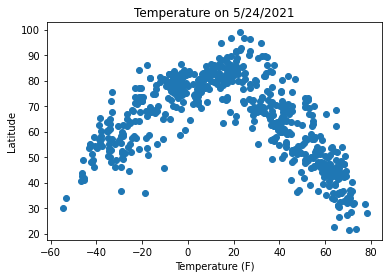

In [116]:
Latitude = city_weather['City_Latitude']
Temperature = city_weather['Max Temp']
plt.scatter(Latitude, Temperature)

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature by Latitude on 5/24/2021')
plt.show()

## Latitude vs. Humidity Plot

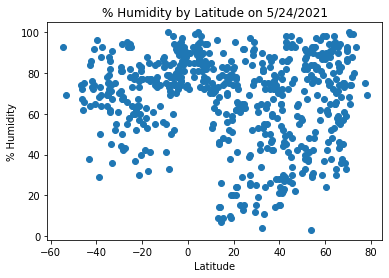

In [118]:
Latitude = city_weather['City_Latitude']
Humidity = city_weather['Humidity']
plt.scatter(Latitude, Humidity)

plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.title('% Humidity by Latitude on 5/24/2021')
plt.show()

## Latitude vs. Cloudiness Plot

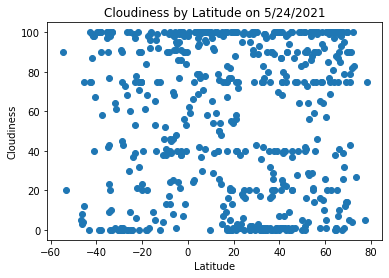

In [120]:
Latitude = city_weather['City_Latitude']
Cloudiness = city_weather['Cloudiness']
plt.scatter(Latitude, Cloudiness)

plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.title('% Cloudiness by Latitude on 5/24/2021')
plt.show()

## Latitude vs. Wind Speed Plot

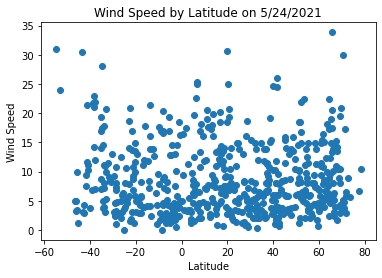

In [122]:
Latitude = city_weather['City_Latitude']
Wind = city_weather['Wind Speed']
plt.scatter(Latitude, Wind)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) by Latitude on 5/24/2021')
plt.show()

## Linear Regression

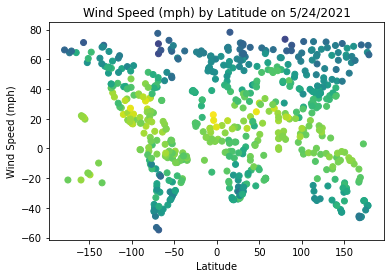

In [128]:
Latitude = city_weather['City_Latitude']
Longitude = city_weather['City_Longitude']

plt.scatter(Longitude, Latitude, c=Temperature, vmin=0, vmax=100)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) by Latitude on 5/24/2021')
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression